### Data & Importing

In [1]:
import pandas as pd
import requests
data=pd.read_csv('coronavirus_summary.csv')
data.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277


In [2]:
import pandas as pd
import requests
url = 'https://api.covid19api.com/summary'
r = requests.get(url)
r
json = r.json()
json
json.keys()
json['Global']

{'NewConfirmed': 177325,
 'TotalConfirmed': 674300771,
 'NewDeaths': 1319,
 'TotalDeaths': 6793224,
 'NewRecovered': 0,
 'TotalRecovered': 0,
 'Date': '2023-04-12T06:09:06.257Z'}

In [3]:
json['Countries']

[{'ID': '48718d47-2582-4557-8a04-d5355f5a1f38',
  'Country': 'Afghanistan',
  'CountryCode': 'AF',
  'Slug': 'afghanistan',
  'NewConfirmed': 0,
  'TotalConfirmed': 209451,
  'NewDeaths': 0,
  'TotalDeaths': 7896,
  'NewRecovered': 0,
  'TotalRecovered': 0,
  'Date': '2023-04-12T06:09:06.257Z',
  'Premium': {}},
 {'ID': '7b25cde5-bbb1-457b-adf1-c9e7a623d85f',
  'Country': 'Albania',
  'CountryCode': 'AL',
  'Slug': 'albania',
  'NewConfirmed': 14,
  'TotalConfirmed': 334457,
  'NewDeaths': 0,
  'TotalDeaths': 3598,
  'NewRecovered': 0,
  'TotalRecovered': 0,
  'Date': '2023-04-12T06:09:06.257Z',
  'Premium': {}},
 {'ID': 'e8179a0c-ec45-49cc-8d6f-35890d5464a2',
  'Country': 'Algeria',
  'CountryCode': 'DZ',
  'Slug': 'algeria',
  'NewConfirmed': 2,
  'TotalConfirmed': 271496,
  'NewDeaths': 0,
  'TotalDeaths': 6881,
  'NewRecovered': 0,
  'TotalRecovered': 0,
  'Date': '2023-04-12T06:09:06.257Z',
  'Premium': {}},
 {'ID': 'b141eab0-c299-4086-964e-85e18c78d4e9',
  'Country': 'Andorra',
 

In [4]:
json['Date']

'2023-04-12T06:09:06.257Z'

In [5]:
type(json['Global'])
type(json['Countries'])
type(json['Date'])

str

In [6]:
type(json['Countries'][0])

dict

In [7]:
df = pd.DataFrame(json['Countries'])

In [8]:
df

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,48718d47-2582-4557-8a04-d5355f5a1f38,Afghanistan,AF,afghanistan,0,209451,0,7896,0,0,2023-04-12T06:09:06.257Z,{}
1,7b25cde5-bbb1-457b-adf1-c9e7a623d85f,Albania,AL,albania,14,334457,0,3598,0,0,2023-04-12T06:09:06.257Z,{}
2,e8179a0c-ec45-49cc-8d6f-35890d5464a2,Algeria,DZ,algeria,2,271496,0,6881,0,0,2023-04-12T06:09:06.257Z,{}
3,b141eab0-c299-4086-964e-85e18c78d4e9,Andorra,AD,andorra,0,47890,0,165,0,0,2023-04-12T06:09:06.257Z,{}
4,ecc27860-505e-40bc-94c4-e891cbdab851,Angola,AO,angola,0,105288,0,1933,0,0,2023-04-12T06:09:06.257Z,{}
...,...,...,...,...,...,...,...,...,...,...,...,...
192,f60e43b1-f728-4874-b032-05a8cfbac5b3,Venezuela (Bolivarian Republic),VE,venezuela,5,552162,0,5854,0,0,2023-04-12T06:09:06.257Z,{}
193,c2f058f0-4f7c-4296-a453-2321205470e1,Viet Nam,VN,vietnam,0,11526994,0,43186,0,0,2023-04-12T06:09:06.257Z,{}
194,5888d511-038f-4ee6-b6cd-d0046628614b,Yemen,YE,yemen,0,11945,0,2159,0,0,2023-04-12T06:09:06.257Z,{}
195,5d5617c3-20a7-4581-819e-ecf98d64ccc8,Zambia,ZM,zambia,0,343135,0,4057,0,0,2023-04-12T06:09:06.257Z,{}


### Preparation & Analysis

In [9]:
merged_data=pd.merge(data,df, left_on='country', right_on='Country')

In [10]:
merged_data.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636,48718d47-2582-4557-8a04-d5355f5a1f38,Afghanistan,AF,afghanistan,0,209451,0,7896,0,0,2023-04-12T06:09:06.257Z,{}
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945,7b25cde5-bbb1-457b-adf1-c9e7a623d85f,Albania,AL,albania,14,334457,0,3598,0,0,2023-04-12T06:09:06.257Z,{}
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517,e8179a0c-ec45-49cc-8d6f-35890d5464a2,Algeria,DZ,algeria,2,271496,0,6881,0,0,2023-04-12T06:09:06.257Z,{}
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495,b141eab0-c299-4086-964e-85e18c78d4e9,Andorra,AD,andorra,0,47890,0,165,0,0,2023-04-12T06:09:06.257Z,{}
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277,ecc27860-505e-40bc-94c4-e891cbdab851,Angola,AO,angola,0,105288,0,1933,0,0,2023-04-12T06:09:06.257Z,{}


In [11]:
brics_dict = {'country':            ['Afghanistan','Albania', 'Algeria', 'Andorra', 'Angola'],
              'continent':          ['Asia','Europe','Africa', 'Europe', 'Africa'],
              'total_confirmed':    ['179267', '275574', '265816', '42156', '99194'],
              'total_deaths':       ['7690.0', '3497.0', '6875.0', '153.0', '1900.0']}

In [12]:
brics_dict

{'country': ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola'],
 'continent': ['Asia', 'Europe', 'Africa', 'Europe', 'Africa'],
 'total_confirmed': ['179267', '275574', '265816', '42156', '99194'],
 'total_deaths': ['7690.0', '3497.0', '6875.0', '153.0', '1900.0']}

In [13]:
import pandas as pd

In [14]:
brics_df = pd.DataFrame(brics_dict)

In [15]:
brics_df

,country,continent,total_confirmed,total_deaths
0,Afghanistan,Asia,179267,7690.0
1,Albania,Europe,275574,3497.0
2,Algeria,Africa,265816,6875.0
3,Andorra,Europe,42156,153.0
4,Angola,Africa,99194,1900.0


In [16]:
brics_df['continent']

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [17]:
import numpy

In [18]:
numpy.mean([179267,275574,265816,42156,99194])

172401.4

In [19]:
merged_data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            157, 158, 159, 160, 161, 162, 163, 164, 165, 166],
           dtype='int64', length=167)

In [20]:
merged_data.set_index('continent').head()

,country,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
continent,,,,,,,,,,,,,,,,,,,,,,,
Asia,Afghanistan,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636,48718d47-2582-4557-8a04-d5355f5a1f38,Afghanistan,AF,afghanistan,0,209451,0,7896,0,0,2023-04-12T06:09:06.257Z,{}
Europe,Albania,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945,7b25cde5-bbb1-457b-adf1-c9e7a623d85f,Albania,AL,albania,14,334457,0,3598,0,0,2023-04-12T06:09:06.257Z,{}
Africa,Algeria,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517,e8179a0c-ec45-49cc-8d6f-35890d5464a2,Algeria,DZ,algeria,2,271496,0,6881,0,0,2023-04-12T06:09:06.257Z,{}
Europe,Andorra,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495,b141eab0-c299-4086-964e-85e18c78d4e9,Andorra,AD,andorra,0,47890,0,165,0,0,2023-04-12T06:09:06.257Z,{}
Africa,Angola,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277,ecc27860-505e-40bc-94c4-e891cbdab851,Angola,AO,angola,0,105288,0,1933,0,0,2023-04-12T06:09:06.257Z,{}


In [21]:
merged_data.set_index('CountryCode').head(15)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
CountryCode,,,,,,,,,,,,,,,,,,,,,,,
AF,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636,48718d47-2582-4557-8a04-d5355f5a1f38,Afghanistan,afghanistan,0,209451,0,7896,0,0,2023-04-12T06:09:06.257Z,{}
AL,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945,7b25cde5-bbb1-457b-adf1-c9e7a623d85f,Albania,albania,14,334457,0,3598,0,0,2023-04-12T06:09:06.257Z,{}
DZ,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517,e8179a0c-ec45-49cc-8d6f-35890d5464a2,Algeria,algeria,2,271496,0,6881,0,0,2023-04-12T06:09:06.257Z,{}
AD,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495,b141eab0-c299-4086-964e-85e18c78d4e9,Andorra,andorra,0,47890,0,165,0,0,2023-04-12T06:09:06.257Z,{}
AO,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277,ecc27860-505e-40bc-94c4-e891cbdab851,Angola,angola,0,105288,0,1933,0,0,2023-04-12T06:09:06.257Z,{}
AR,Argentina,South America,9101319,128729.0,8895999.0,76591.0,372.0,197992,2800.0,35716069.0,776974.0,45968174,5865744a-851c-406f-acbf-81144af1ad93,Argentina,argentina,0,10044957,0,130472,0,0,2023-04-12T06:09:06.257Z,{}
AM,Armenia,Asia,422896,8623.0,412048.0,2225.0,NaN,142219,2900.0,3068217.0,1031834.0,2973558,69ab47f2-f822-4e14-9d10-ce23cb7f354b,Armenia,armenia,0,447308,0,8727,0,0,2023-04-12T06:09:06.257Z,{}
AU,Australia,Australia/Oceania,6593795,7794.0,6199822.0,386179.0,129.0,253112,299.0,70885598.0,2721042.0,26050899,21efc688-a9b9-4422-ab43-6d65cdf9f6c8,Australia,australia,13926,11399460,115,19574,0,0,2023-04-12T06:09:06.257Z,{}
AT,Austria,Europe,4212492,18303.0,4135885.0,58304.0,58.0,462804,2011.0,185034905.0,20328801.0,9102106,dcb2457b-2958-49f8-bade-1205f53739f0,Austria,austria,5283,5961143,21,21970,0,0,2023-04-12T06:09:06.257Z,{}


In [22]:
merged_data.describe()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
count,1.670000e+02,165.000000,1.540000e+02,1.540000e+02,116.000000,167.000000,165.000000,1.600000e+02,1.600000e+02,1.670000e+02,167.000000,1.670000e+02,167.000000,167.000000,167.0,167.0
mean,2.189262e+06,27138.739394,2.143870e+06,6.639467e+04,285.387931,135114.107784,1147.424242,2.730644e+07,1.663999e+06,4.140718e+07,470.311377,2.829078e+06,4.000000,28801.077844,0.0,0.0
std,5.502456e+06,76847.489691,5.522143e+06,2.144310e+05,948.994798,149626.091894,1241.582896,8.488445e+07,3.037592e+06,1.585997e+08,1868.368007,7.133556e+06,16.836564,79816.136165,0.0,0.0
min,8.000000e+00,6.000000,5.000000e+00,0.000000e+00,1.000000,154.000000,3.000000,5.117000e+03,5.093000e+03,1.095100e+04,0.000000,5.014000e+03,0.000000,1.000000,0.0,0.0
25%,4.574200e+04,697.000000,4.271475e+04,4.615000e+02,6.000000,9273.000000,133.000000,6.478068e+05,1.313588e+05,2.491546e+06,0.000000,5.812900e+04,0.000000,688.000000,0.0,0.0
50%,3.894080e+05,4028.000000,2.874260e+05,2.746000e+03,23.000000,75704.000000,739.000000,3.470085e+06,6.480905e+05,9.443535e+06,0.000000,4.722500e+05,0.000000,4090.000000,0.0,0.0
75%,1.532350e+06,18303.000000,1.443523e+06,2.348400e+04,152.250000,208791.000000,1847.000000,1.700775e+07,1.821900e+06,2.956447e+07,5.000000,1.932704e+06,0.000000,19726.000000,0.0,0.0
max,4.312160e+07,664920.000000,4.257969e+07,1.685607e+06,8318.000000,543983.000000,6297.000000,8.438369e+08,2.184247e+07,1.439324e+09,13926.000000,4.469074e+07,127.000000,699276.000000,0.0,0.0


In [23]:
merged_data.dtypes

country                            object
continent                          object
total_confirmed                     int64
total_deaths                      float64
total_recovered                   float64
active_cases                      float64
serious_or_critical               float64
total_cases_per_1m_population       int64
total_deaths_per_1m_population    float64
total_tests                       float64
total_tests_per_1m_population     float64
population                          int64
ID                                 object
Country                            object
CountryCode                        object
Slug                               object
NewConfirmed                        int64
TotalConfirmed                      int64
NewDeaths                           int64
TotalDeaths                         int64
NewRecovered                        int64
TotalRecovered                      int64
Date                               object
Premium                           

In [24]:
merged_data.astype({'active_cases':str}).dtypes

country                            object
continent                          object
total_confirmed                     int64
total_deaths                      float64
total_recovered                   float64
active_cases                       object
serious_or_critical               float64
total_cases_per_1m_population       int64
total_deaths_per_1m_population    float64
total_tests                       float64
total_tests_per_1m_population     float64
population                          int64
ID                                 object
Country                            object
CountryCode                        object
Slug                               object
NewConfirmed                        int64
TotalConfirmed                      int64
NewDeaths                           int64
TotalDeaths                         int64
NewRecovered                        int64
TotalRecovered                      int64
Date                               object
Premium                           

In [25]:
merged_data['country']

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
162        Vanuatu
163       Viet Nam
164          Yemen
165         Zambia
166       Zimbabwe
Name: country, Length: 167, dtype: object

In [26]:
merged_data[['country', 'continent', 'total_confirmed', 'total_deaths']]

,country,continent,total_confirmed,total_deaths
0,Afghanistan,Asia,179267,7690.0
1,Albania,Europe,275574,3497.0
2,Algeria,Africa,265816,6875.0
3,Andorra,Europe,42156,153.0
4,Angola,Africa,99194,1900.0
...,...,...,...,...
162,Vanuatu,Australia/Oceania,8457,14.0
163,Viet Nam,Asia,10696630,43065.0
164,Yemen,Asia,11819,2149.0
165,Zambia,Africa,320591,3983.0


In [27]:
merged_data[0:10][['CountryCode', 'country', 'continent','total_confirmed','total_deaths']]

,CountryCode,country,continent,total_confirmed,total_deaths
0,AF,Afghanistan,Asia,179267,7690.0
1,AL,Albania,Europe,275574,3497.0
2,DZ,Algeria,Africa,265816,6875.0
3,AD,Andorra,Europe,42156,153.0
4,AO,Angola,Africa,99194,1900.0
5,AR,Argentina,South America,9101319,128729.0
6,AM,Armenia,Asia,422896,8623.0
7,AU,Australia,Australia/Oceania,6593795,7794.0
8,AT,Austria,Europe,4212492,18303.0
9,AZ,Azerbaijan,Asia,792638,9709.0


In [28]:
merged_data.iloc[0,2]

179267

In [29]:
merged_data.iloc[[5,25,75,165], [0,1,2,3,4,5]]

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases
5,Argentina,South America,9101319,128729.0,8895999.0,76591.0
25,Burundi,Africa,41235,38.0,NaN,NaN
75,Japan,Asia,8338211,30039.0,7951587.0,356585.0
165,Zambia,Africa,320591,3983.0,315997.0,611.0


In [30]:
merged_data.iloc[0:10, 0:6]

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0
1,Albania,Europe,275574,3497.0,271826.0,251.0
2,Algeria,Africa,265816,6875.0,178371.0,80570.0
3,Andorra,Europe,42156,153.0,41021.0,982.0
4,Angola,Africa,99194,1900.0,97149.0,145.0
5,Argentina,South America,9101319,128729.0,8895999.0,76591.0
6,Armenia,Asia,422896,8623.0,412048.0,2225.0
7,Australia,Australia/Oceania,6593795,7794.0,6199822.0,386179.0
8,Austria,Europe,4212492,18303.0,4135885.0,58304.0
9,Azerbaijan,Asia,792638,9709.0,782869.0,60.0


In [31]:
merged_data.iloc[0:10, 0:6]

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0
1,Albania,Europe,275574,3497.0,271826.0,251.0
2,Algeria,Africa,265816,6875.0,178371.0,80570.0
3,Andorra,Europe,42156,153.0,41021.0,982.0
4,Angola,Africa,99194,1900.0,97149.0,145.0
5,Argentina,South America,9101319,128729.0,8895999.0,76591.0
6,Armenia,Asia,422896,8623.0,412048.0,2225.0
7,Australia,Australia/Oceania,6593795,7794.0,6199822.0,386179.0
8,Austria,Europe,4212492,18303.0,4135885.0,58304.0
9,Azerbaijan,Asia,792638,9709.0,782869.0,60.0


In [32]:
merged_data_labelled = merged_data.set_index('CountryCode')
merged_data_labelled.loc[['DJ','FI','GA','JP', 'PG']]

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
CountryCode,,,,,,,,,,,,,,,,,,,,,,,
DJ,Djibouti,Africa,15631,189.0,15427.0,15.0,NaN,15404,186.0,305941.0,301492.0,1014756,67bad3e4-d365-4721-9280-6ce6d42a7117,Djibouti,djibouti,0,15690,0,189,0,0,2023-04-12T06:09:06.257Z,{}
FI,Finland,Europe,1069740,4284.0,NaN,NaN,21.0,192512,771.0,10832080.0,1949355.0,5556750,afd4131a-886f-4c1b-b0ac-416d33d7b89d,Finland,finland,668,1463644,31,8967,0,0,2023-04-12T06:09:06.257Z,{}
GA,Gabon,Africa,47608,304.0,47297.0,7.0,NaN,20490,131.0,1594523.0,686256.0,2323511,27a74ea5-8124-4eac-a7db-d17eda5da1d3,Gabon,gabon,0,48981,0,306,0,0,2023-04-12T06:09:06.257Z,{}
JP,Japan,Asia,8338211,30039.0,7951587.0,356585.0,139.0,66305,239.0,50444181.0,401129.0,125755488,192b4b5c-8cda-409a-b6ad-5395000cb6b5,Japan,japan,9834,33320438,80,72997,0,0,2023-04-12T06:09:06.257Z,{}
PG,Papua New Guinea,Australia/Oceania,43876,651.0,43200.0,25.0,7.0,4737,70.0,249149.0,26898.0,9262605,d99fd065-68fa-4d12-af44-70bdfcd34611,Papua New Guinea,papua-new-guinea,0,46825,0,670,0,0,2023-04-12T06:09:06.257Z,{}


In [33]:
merged_data[merged_data['total_confirmed'] > 5000000].head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
5,Argentina,South America,9101319,128729.0,8895999.0,76591.0,372.0,197992,2800.0,35716069.0,776974.0,45968174,5865744a-851c-406f-acbf-81144af1ad93,Argentina,AR,argentina,0,10044957,0,130472,0,0,2023-04-12T06:09:06.257Z,{}
7,Australia,Australia/Oceania,6593795,7794.0,6199822.0,386179.0,129.0,253112,299.0,70885598.0,2721042.0,26050899,21efc688-a9b9-4422-ab43-6d65cdf9f6c8,Australia,AU,australia,13926,11399460,115,19574,0,0,2023-04-12T06:09:06.257Z,{}
21,Brazil,South America,30682094,664920.0,29718402.0,298772.0,8318.0,142460,3087.0,63776166.0,296119.0,215373503,aea4fb6b-586d-499a-8103-063317b1517d,Brazil,BR,brazil,0,37076053,0,699276,0,0,2023-04-12T06:09:06.257Z,{}
33,Colombia,South America,6095316,139821.0,5928829.0,26666.0,342.0,117459,2694.0,34675581.0,668214.0,51892950,21828fbd-7d09-4e4d-b409-78cf2b737465,Colombia,CO,colombia,0,6359093,0,142339,0,0,2023-04-12T06:09:06.257Z,{}
53,France,Europe,29160802,147257.0,28156674.0,856871.0,1329.0,444914,2247.0,271490188.0,4142201.0,65542502,1eb11cbb-a861-4519-b098-731b0f6cea8b,France,FR,france,6308,39866718,11,166176,0,0,2023-04-12T06:09:06.257Z,{}


In [34]:
merged_data[merged_data['total_confirmed'] > 5000000].head(20)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
5,Argentina,South America,9101319,128729.0,8895999.0,76591.0,372.0,197992,2800.0,35716069.0,776974.0,45968174,5865744a-851c-406f-acbf-81144af1ad93,Argentina,AR,argentina,0,10044957,0,130472,0,0,2023-04-12T06:09:06.257Z,{}
7,Australia,Australia/Oceania,6593795,7794.0,6199822.0,386179.0,129.0,253112,299.0,70885598.0,2721042.0,26050899,21efc688-a9b9-4422-ab43-6d65cdf9f6c8,Australia,AU,australia,13926,11399460,115,19574,0,0,2023-04-12T06:09:06.257Z,{}
21,Brazil,South America,30682094,664920.0,29718402.0,298772.0,8318.0,142460,3087.0,63776166.0,296119.0,215373503,aea4fb6b-586d-499a-8103-063317b1517d,Brazil,BR,brazil,0,37076053,0,699276,0,0,2023-04-12T06:09:06.257Z,{}
33,Colombia,South America,6095316,139821.0,5928829.0,26666.0,342.0,117459,2694.0,34675581.0,668214.0,51892950,21828fbd-7d09-4e4d-b409-78cf2b737465,Colombia,CO,colombia,0,6359093,0,142339,0,0,2023-04-12T06:09:06.257Z,{}
53,France,Europe,29160802,147257.0,28156674.0,856871.0,1329.0,444914,2247.0,271490188.0,4142201.0,65542502,1eb11cbb-a861-4519-b098-731b0f6cea8b,France,FR,france,6308,39866718,11,166176,0,0,2023-04-12T06:09:06.257Z,{}
57,Germany,Europe,25780226,137919.0,23956700.0,1685607.0,1279.0,305877,1636.0,122332384.0,1451450.0,84282880,dccb8819-a679-4c58-94eb-67da0fb7ff40,Germany,DE,germany,7829,38249060,127,168935,0,0,2023-04-12T06:09:06.257Z,{}
68,India,Asia,43121599,524214.0,42579693.0,17692.0,698.0,30686,373.0,843836914.0,600479.0,1405273033,0d74bd8a-84f7-4758-a220-043441f1568b,India,IN,india,440,44690738,3,530779,0,0,2023-04-12T06:09:06.257Z,{}
69,Indonesia,Asia,6050776,156458.0,5889534.0,4784.0,2771.0,21694,561.0,97245391.0,348662.0,278910317,57ebf562-56f1-4aa5-8ade-23e891c88896,Indonesia,ID,indonesia,307,6738225,4,160941,0,0,2023-04-12T06:09:06.257Z,{}
73,Italy,Europe,17057873,165244.0,15894511.0,998118.0,347.0,282901,2741.0,217853667.0,3613054.0,60296265,bd36540e-ece5-4b07-b3d2-0968cf26982f,Italy,IT,italy,0,25603510,0,188322,0,0,2023-04-12T06:09:06.257Z,{}
75,Japan,Asia,8338211,30039.0,7951587.0,356585.0,139.0,66305,239.0,50444181.0,401129.0,125755488,192b4b5c-8cda-409a-b6ad-5395000cb6b5,Japan,JP,japan,9834,33320438,80,72997,0,0,2023-04-12T06:09:06.257Z,{}


In [35]:
(merged_data['total_deaths'] >= 1000000) & (merged_data['total_deaths'] <5000)

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Name: total_deaths, Length: 167, dtype: bool

In [36]:
merged_data[(merged_data['total_deaths'] >= 500000) & (merged_data['total_deaths'] <1000000)]

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
21,Brazil,South America,30682094,664920.0,29718402.0,298772.0,8318.0,142460,3087.0,63776166.0,296119.0,215373503,aea4fb6b-586d-499a-8103-063317b1517d,Brazil,BR,brazil,0,37076053,0,699276,0,0,2023-04-12T06:09:06.257Z,{}
68,India,Asia,43121599,524214.0,42579693.0,17692.0,698.0,30686,373.0,843836914.0,600479.0,1405273033,0d74bd8a-84f7-4758-a220-043441f1568b,India,IN,india,440,44690738,3,530779,0,0,2023-04-12T06:09:06.257Z,{}


In [37]:
merged_data.drop_duplicates(subset=['country','continent']).head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636,48718d47-2582-4557-8a04-d5355f5a1f38,Afghanistan,AF,afghanistan,0,209451,0,7896,0,0,2023-04-12T06:09:06.257Z,{}
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945,7b25cde5-bbb1-457b-adf1-c9e7a623d85f,Albania,AL,albania,14,334457,0,3598,0,0,2023-04-12T06:09:06.257Z,{}
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517,e8179a0c-ec45-49cc-8d6f-35890d5464a2,Algeria,DZ,algeria,2,271496,0,6881,0,0,2023-04-12T06:09:06.257Z,{}
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495,b141eab0-c299-4086-964e-85e18c78d4e9,Andorra,AD,andorra,0,47890,0,165,0,0,2023-04-12T06:09:06.257Z,{}
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277,ecc27860-505e-40bc-94c4-e891cbdab851,Angola,AO,angola,0,105288,0,1933,0,0,2023-04-12T06:09:06.257Z,{}


In [38]:
merged_data.drop_duplicates(subset=['country','continent']).head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636,48718d47-2582-4557-8a04-d5355f5a1f38,Afghanistan,AF,afghanistan,0,209451,0,7896,0,0,2023-04-12T06:09:06.257Z,{}
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945,7b25cde5-bbb1-457b-adf1-c9e7a623d85f,Albania,AL,albania,14,334457,0,3598,0,0,2023-04-12T06:09:06.257Z,{}
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517,e8179a0c-ec45-49cc-8d6f-35890d5464a2,Algeria,DZ,algeria,2,271496,0,6881,0,0,2023-04-12T06:09:06.257Z,{}
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495,b141eab0-c299-4086-964e-85e18c78d4e9,Andorra,AD,andorra,0,47890,0,165,0,0,2023-04-12T06:09:06.257Z,{}
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277,ecc27860-505e-40bc-94c4-e891cbdab851,Angola,AO,angola,0,105288,0,1933,0,0,2023-04-12T06:09:06.257Z,{}


In [39]:
missing_values = merged_data['serious_or_critical'].isnull().sum()

In [40]:
missing_values

51

In [41]:
total_rows = merged_data.shape[0]

In [42]:
merged_data.shape

(167, 24)

In [43]:
merged_data[~merged_data['continent'].isnull()]

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636,48718d47-2582-4557-8a04-d5355f5a1f38,Afghanistan,AF,afghanistan,0,209451,0,7896,0,0,2023-04-12T06:09:06.257Z,{}
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945,7b25cde5-bbb1-457b-adf1-c9e7a623d85f,Albania,AL,albania,14,334457,0,3598,0,0,2023-04-12T06:09:06.257Z,{}
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517,e8179a0c-ec45-49cc-8d6f-35890d5464a2,Algeria,DZ,algeria,2,271496,0,6881,0,0,2023-04-12T06:09:06.257Z,{}
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495,b141eab0-c299-4086-964e-85e18c78d4e9,Andorra,AD,andorra,0,47890,0,165,0,0,2023-04-12T06:09:06.257Z,{}
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277,ecc27860-505e-40bc-94c4-e891cbdab851,Angola,AO,angola,0,105288,0,1933,0,0,2023-04-12T06:09:06.257Z,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,Australia/Oceania,8457,14.0,7974.0,469.0,NaN,26386,44.0,24976.0,77926.0,320508,ffe5a488-b9a0-4910-a6e3-e0f17e622d32,Vanuatu,VU,vanuatu,0,12014,0,14,0,0,2023-04-12T06:09:06.257Z,{}
163,Viet Nam,Asia,10696630,43065.0,9355040.0,1298525.0,340.0,108080,435.0,85811485.0,867048.0,98969721,c2f058f0-4f7c-4296-a453-2321205470e1,Viet Nam,VN,vietnam,0,11526994,0,43186,0,0,2023-04-12T06:09:06.257Z,{}
164,Yemen,Asia,11819,2149.0,9009.0,661.0,23.0,381,69.0,265253.0,8543.0,31049015,5888d511-038f-4ee6-b6cd-d0046628614b,Yemen,YE,yemen,0,11945,0,2159,0,0,2023-04-12T06:09:06.257Z,{}
165,Zambia,Africa,320591,3983.0,315997.0,611.0,NaN,16575,206.0,3452554.0,178497.0,19342381,5d5617c3-20a7-4581-819e-ecf98d64ccc8,Zambia,ZM,zambia,0,343135,0,4057,0,0,2023-04-12T06:09:06.257Z,{}


In [44]:
merged_data.dropna(how='all',subset=['CountryCode','continent']).shape

(167, 24)

In [45]:
merged_data.fillna(method='bfill', axis=1).fillna(0).head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636,48718d47-2582-4557-8a04-d5355f5a1f38,Afghanistan,AF,afghanistan,0,209451,0,7896,0,0,2023-04-12T06:09:06.257Z,{}
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945,7b25cde5-bbb1-457b-adf1-c9e7a623d85f,Albania,AL,albania,14,334457,0,3598,0,0,2023-04-12T06:09:06.257Z,{}
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517,e8179a0c-ec45-49cc-8d6f-35890d5464a2,Algeria,DZ,algeria,2,271496,0,6881,0,0,2023-04-12T06:09:06.257Z,{}
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495,b141eab0-c299-4086-964e-85e18c78d4e9,Andorra,AD,andorra,0,47890,0,165,0,0,2023-04-12T06:09:06.257Z,{}
4,Angola,Africa,99194,1900.0,97149.0,145.0,2853.0,2853,55.0,1499795.0,43136.0,34769277,ecc27860-505e-40bc-94c4-e891cbdab851,Angola,AO,angola,0,105288,0,1933,0,0,2023-04-12T06:09:06.257Z,{}


In [46]:
merged_data.sort_values(by = "total_confirmed")

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
108,Nauru,Australia/Oceania,8,NaN,5.0,3.0,NaN,731,NaN,NaN,NaN,10951,91cd74fe-1718-43da-b9d4-984da88557e3,Nauru,NR,nauru,0,5247,0,1,0,0,2023-04-12T06:09:06.257Z,{}
96,Marshall Islands,Australia/Oceania,17,NaN,14.0,3.0,NaN,284,NaN,NaN,NaN,59934,c07aa719-442b-42b6-ac63-61b3e76233f3,Marshall Islands,MH,marshall-islands,0,15649,0,17,0,0,2023-04-12T06:09:06.257Z,{}
79,Kiribati,Australia/Oceania,3093,13.0,2602.0,478.0,3.0,25175,106.0,NaN,NaN,122862,1e5dad76-bb48-474a-b3aa-6d21a62a8f6c,Kiribati,KI,kiribati,0,5014,0,18,0,0,2023-04-12T06:09:06.257Z,{}
118,Palau,Australia/Oceania,4879,6.0,4166.0,707.0,1.0,267269,329.0,49264.0,2698658.0,18255,7d657699-84f8-43ae-a7a2-91fd673e7402,Palau,PW,palau,0,5991,0,9,0,0,2023-04-12T06:09:06.257Z,{}
30,Chad,Africa,7414,193.0,4874.0,2347.0,NaN,428,11.0,191341.0,11058.0,17303260,95cbc1a6-d8f4-4ad1-aab6-454dd7b3ecab,Chad,TD,chad,0,7679,0,194,0,0,2023-04-12T06:09:06.257Z,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Italy,Europe,17057873,165244.0,15894511.0,998118.0,347.0,282901,2741.0,217853667.0,3613054.0,60296265,bd36540e-ece5-4b07-b3d2-0968cf26982f,Italy,IT,italy,0,25603510,0,188322,0,0,2023-04-12T06:09:06.257Z,{}
57,Germany,Europe,25780226,137919.0,23956700.0,1685607.0,1279.0,305877,1636.0,122332384.0,1451450.0,84282880,dccb8819-a679-4c58-94eb-67da0fb7ff40,Germany,DE,germany,7829,38249060,127,168935,0,0,2023-04-12T06:09:06.257Z,{}
53,France,Europe,29160802,147257.0,28156674.0,856871.0,1329.0,444914,2247.0,271490188.0,4142201.0,65542502,1eb11cbb-a861-4519-b098-731b0f6cea8b,France,FR,france,6308,39866718,11,166176,0,0,2023-04-12T06:09:06.257Z,{}
21,Brazil,South America,30682094,664920.0,29718402.0,298772.0,8318.0,142460,3087.0,63776166.0,296119.0,215373503,aea4fb6b-586d-499a-8103-063317b1517d,Brazil,BR,brazil,0,37076053,0,699276,0,0,2023-04-12T06:09:06.257Z,{}


In [47]:
merged_data.sort_values(by = "total_confirmed", ascending=False)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
68,India,Asia,43121599,524214.0,42579693.0,17692.0,698.0,30686,373.0,843836914.0,600479.0,1405273033,0d74bd8a-84f7-4758-a220-043441f1568b,India,IN,india,440,44690738,3,530779,0,0,2023-04-12T06:09:06.257Z,{}
21,Brazil,South America,30682094,664920.0,29718402.0,298772.0,8318.0,142460,3087.0,63776166.0,296119.0,215373503,aea4fb6b-586d-499a-8103-063317b1517d,Brazil,BR,brazil,0,37076053,0,699276,0,0,2023-04-12T06:09:06.257Z,{}
53,France,Europe,29160802,147257.0,28156674.0,856871.0,1329.0,444914,2247.0,271490188.0,4142201.0,65542502,1eb11cbb-a861-4519-b098-731b0f6cea8b,France,FR,france,6308,39866718,11,166176,0,0,2023-04-12T06:09:06.257Z,{}
57,Germany,Europe,25780226,137919.0,23956700.0,1685607.0,1279.0,305877,1636.0,122332384.0,1451450.0,84282880,dccb8819-a679-4c58-94eb-67da0fb7ff40,Germany,DE,germany,7829,38249060,127,168935,0,0,2023-04-12T06:09:06.257Z,{}
73,Italy,Europe,17057873,165244.0,15894511.0,998118.0,347.0,282901,2741.0,217853667.0,3613054.0,60296265,bd36540e-ece5-4b07-b3d2-0968cf26982f,Italy,IT,italy,0,25603510,0,188322,0,0,2023-04-12T06:09:06.257Z,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,Chad,Africa,7414,193.0,4874.0,2347.0,NaN,428,11.0,191341.0,11058.0,17303260,95cbc1a6-d8f4-4ad1-aab6-454dd7b3ecab,Chad,TD,chad,0,7679,0,194,0,0,2023-04-12T06:09:06.257Z,{}
118,Palau,Australia/Oceania,4879,6.0,4166.0,707.0,1.0,267269,329.0,49264.0,2698658.0,18255,7d657699-84f8-43ae-a7a2-91fd673e7402,Palau,PW,palau,0,5991,0,9,0,0,2023-04-12T06:09:06.257Z,{}
79,Kiribati,Australia/Oceania,3093,13.0,2602.0,478.0,3.0,25175,106.0,NaN,NaN,122862,1e5dad76-bb48-474a-b3aa-6d21a62a8f6c,Kiribati,KI,kiribati,0,5014,0,18,0,0,2023-04-12T06:09:06.257Z,{}
96,Marshall Islands,Australia/Oceania,17,NaN,14.0,3.0,NaN,284,NaN,NaN,NaN,59934,c07aa719-442b-42b6-ac63-61b3e76233f3,Marshall Islands,MH,marshall-islands,0,15649,0,17,0,0,2023-04-12T06:09:06.257Z,{}


In [48]:
import pandas as pd
import requests
Vacc_data=pd.read_csv('Worldwide Vaccine Data.csv')
Vacc_data.head()

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated
0,Afghanistan,33,12526397,30.0,28.0
1,Albania,106,3025728,47.0,44.0
2,Algeria,35,15267442,18.0,15.0
3,Angola,74,23701049,47.0,26.0
4,Argentina,252,113272665,92.0,84.0


In [49]:
merged_vacc_data=pd.merge(merged_data,Vacc_data, left_on='Country', right_on='Country')

In [50]:
merged_vacc_data.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636,48718d47-2582-4557-8a04-d5355f5a1f38,Afghanistan,AF,afghanistan,0,209451,0,7896,0,0,2023-04-12T06:09:06.257Z,{},33,12526397,30.0,28.0
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945,7b25cde5-bbb1-457b-adf1-c9e7a623d85f,Albania,AL,albania,14,334457,0,3598,0,0,2023-04-12T06:09:06.257Z,{},106,3025728,47.0,44.0
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517,e8179a0c-ec45-49cc-8d6f-35890d5464a2,Algeria,DZ,algeria,2,271496,0,6881,0,0,2023-04-12T06:09:06.257Z,{},35,15267442,18.0,15.0
3,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277,ecc27860-505e-40bc-94c4-e891cbdab851,Angola,AO,angola,0,105288,0,1933,0,0,2023-04-12T06:09:06.257Z,{},74,23701049,47.0,26.0
4,Argentina,South America,9101319,128729.0,8895999.0,76591.0,372.0,197992,2800.0,35716069.0,776974.0,45968174,5865744a-851c-406f-acbf-81144af1ad93,Argentina,AR,argentina,0,10044957,0,130472,0,0,2023-04-12T06:09:06.257Z,{},252,113272665,92.0,84.0


In [51]:
merged_vacc_data.groupby('continent')

In [52]:
merged_vacc_data.groupby(['continent', 'CountryCode', 'country'])

In [53]:
merged_vacc_data.groupby('continent').mean()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated
continent,,,,,,,,,,,,,,,,,,,,
Africa,2.539915e+05,5629.340909,2.348818e+05,10351.550000,39.521739,15440.863636,280.818182,2.233248e+06,1.454993e+05,2.726979e+07,10.068182,2.740188e+05,0.000000,5722.886364,0.0,0.0,62.136364,1.502955e+07,38.700000,32.154545
Asia,3.060460e+06,33122.027778,2.994928e+06,32410.555556,368.444444,111533.972222,708.722222,4.510482e+07,1.565630e+06,8.115647e+07,347.583333,4.013715e+06,2.888889,35325.722222,0.0,0.0,164.638889,1.320631e+08,66.319444,61.266667
Australia/Oceania,8.664681e+05,1159.777778,8.148389e+05,50469.444444,29.000000,85927.888889,230.777778,9.926789e+06,1.257185e+06,4.743839e+06,1547.555556,1.536257e+06,12.777778,2656.000000,0.0,0.0,162.111111,8.847915e+06,69.466667,61.500000
Europe,4.370769e+06,35725.600000,4.679423e+06,188167.964286,170.906250,309568.085714,2404.200000,5.359605e+07,3.936618e+06,1.508593e+07,1119.457143,5.722201e+06,9.085714,39945.457143,0.0,0.0,181.400000,2.930230e+07,68.285714,66.228571
North America,8.857629e+05,26827.500000,7.929549e+05,65980.500000,494.272727,94805.750000,1287.312500,7.427299e+06,8.337912e+05,1.555273e+07,521.000000,1.075414e+06,6.937500,28034.875000,0.0,0.0,155.062500,2.810982e+07,62.225000,56.381250
South America,5.139150e+06,117310.454545,5.611543e+06,60088.111111,1159.777778,130425.545455,2735.000000,1.971451e+07,7.467066e+05,3.716155e+07,363.272727,6.128144e+06,1.727273,122225.000000,0.0,0.0,201.000000,8.263168e+07,78.000000,70.909091


In [54]:
merged_vacc_data.groupby(['continent', 'CountryCode', 'country']).mean()

total_confirmed  ...  % of population fully vaccinated
continent     CountryCode country                        ...                                  
Africa        AO          Angola                99194.0  ...                              26.0
              BF          Burkina Faso          20853.0  ...                              16.0
              BI          Burundi               41235.0  ...                               0.2
              BJ          Benin                 26952.0  ...                              23.0
              BW          Botswana             306324.0  ...                              62.0
...                                                 ...  ...                               ...
South America GY          Guyana                63804.0  ...                              49.0
              PE          Peru                3571919.0  ...                              87.0
              PY          Paraguay             649718.0  ...                              50.0
              SR          Suriname              80008.0  ...                              41.0
              UY          Uruguay              902540.0  ...                              84.0

[151 rows x 20 columns]

In [55]:
merged_vacc_data.groupby(['continent', 'CountryCode', 'country']).mean()

total_confirmed  ...  % of population fully vaccinated
continent     CountryCode country                        ...                                  
Africa        AO          Angola                99194.0  ...                              26.0
              BF          Burkina Faso          20853.0  ...                              16.0
              BI          Burundi               41235.0  ...                               0.2
              BJ          Benin                 26952.0  ...                              23.0
              BW          Botswana             306324.0  ...                              62.0
...                                                 ...  ...                               ...
South America GY          Guyana                63804.0  ...                              49.0
              PE          Peru                3571919.0  ...                              87.0
              PY          Paraguay             649718.0  ...                              50.0
              SR          Suriname              80008.0  ...                              41.0
              UY          Uruguay              902540.0  ...                              84.0

[151 rows x 20 columns]

In [56]:
merged_vacc_data.groupby(['continent', 'CountryCode', 'country'])['total_confirmed'].agg(['mean', 'median', 'std'])

mean     median  std
continent     CountryCode country                                
Africa        AO          Angola          99194.0    99194.0  NaN
              BF          Burkina Faso    20853.0    20853.0  NaN
              BI          Burundi         41235.0    41235.0  NaN
              BJ          Benin           26952.0    26952.0  NaN
              BW          Botswana       306324.0   306324.0  NaN
...                                           ...        ...  ...
South America GY          Guyana          63804.0    63804.0  NaN
              PE          Peru          3571919.0  3571919.0  NaN
              PY          Paraguay       649718.0   649718.0  NaN
              SR          Suriname        80008.0    80008.0  NaN
              UY          Uruguay        902540.0   902540.0  NaN

[151 rows x 3 columns]

In [57]:
merged_vacc_data.groupby(['continent', 'CountryCode', 'country']).mean().reset_index

<bound method DataFrame.reset_index of                                         total_confirmed  ...  % of population fully vaccinated
continent     CountryCode country                        ...                                  
Africa        AO          Angola                99194.0  ...                              26.0
              BF          Burkina Faso          20853.0  ...                              16.0
              BI          Burundi               41235.0  ...                               0.2
              BJ          Benin                 26952.0  ...                              23.0
              BW          Botswana             306324.0  ...                              62.0
...                                                 ...  ...                               ...
South America GY          Guyana                63804.0  ...                              49.0
              PE          Peru                3571919.0  ...                              87.0
           

In [58]:
for x in merged_vacc_data:
    print(x)

country
continent
total_confirmed
total_deaths
total_recovered
active_cases
serious_or_critical
total_cases_per_1m_population
total_deaths_per_1m_population
total_tests
total_tests_per_1m_population
population
ID
Country
CountryCode
Slug
NewConfirmed
TotalConfirmed
NewDeaths
TotalDeaths
NewRecovered
TotalRecovered
Date
Premium
Doses administered per 100 people
Total doses administered
% of population vaccinated
% of population fully vaccinated


In [59]:
for index, row in merged_vacc_data.head(2).iterrows():
    print(index)
    print(row)

0
country                                                       Afghanistan
continent                                                            Asia
total_confirmed                                                    179267
total_deaths                                                       7690.0
total_recovered                                                  162202.0
active_cases                                                       9375.0
serious_or_critical                                                1124.0
total_cases_per_1m_population                                        4420
total_deaths_per_1m_population                                      190.0
total_tests                                                      951337.0
total_tests_per_1m_population                                     23455.0
population                                                       40560636
ID                                   48718d47-2582-4557-8a04-d5355f5a1f38
Country                             

In [60]:
merged_vacc_data['continent'] = merged_vacc_data['CountryCode'].apply(len)
merged_vacc_data.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated
0,Afghanistan,2,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636,48718d47-2582-4557-8a04-d5355f5a1f38,Afghanistan,AF,afghanistan,0,209451,0,7896,0,0,2023-04-12T06:09:06.257Z,{},33,12526397,30.0,28.0
1,Albania,2,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945,7b25cde5-bbb1-457b-adf1-c9e7a623d85f,Albania,AL,albania,14,334457,0,3598,0,0,2023-04-12T06:09:06.257Z,{},106,3025728,47.0,44.0
2,Algeria,2,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517,e8179a0c-ec45-49cc-8d6f-35890d5464a2,Algeria,DZ,algeria,2,271496,0,6881,0,0,2023-04-12T06:09:06.257Z,{},35,15267442,18.0,15.0
3,Angola,2,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277,ecc27860-505e-40bc-94c4-e891cbdab851,Angola,AO,angola,0,105288,0,1933,0,0,2023-04-12T06:09:06.257Z,{},74,23701049,47.0,26.0
4,Argentina,2,9101319,128729.0,8895999.0,76591.0,372.0,197992,2800.0,35716069.0,776974.0,45968174,5865744a-851c-406f-acbf-81144af1ad93,Argentina,AR,argentina,0,10044957,0,130472,0,0,2023-04-12T06:09:06.257Z,{},252,113272665,92.0,84.0


In [61]:
def Europe_or_Not(df):
    if df in ['Europe']:
        return 'In_Europe'
    else:
        return "Not_in_Europe"

In [62]:
merged_vacc_data['location'] = merged_vacc_data['continent'].apply(Europe_or_Not)
merged_vacc_data.tail()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated,location
146,Uzbekistan,2,238802,1637.0,236974.0,191.0,23.0,6947,48.0,1377915.0,40088.0,34372515,94923b92-f3cb-41e7-8dbb-561e6c636c1b,Uzbekistan,UZ,uzbekistan,0,251247,0,1637,0,0,2023-04-12T06:09:06.257Z,{},214,71888007,63.0,53.0,Not_in_Europe
147,Vanuatu,2,8457,14.0,7974.0,469.0,NaN,26386,44.0,24976.0,77926.0,320508,ffe5a488-b9a0-4910-a6e3-e0f17e622d32,Vanuatu,VU,vanuatu,0,12014,0,14,0,0,2023-04-12T06:09:06.257Z,{},98,293584,48.0,44.0,Not_in_Europe
148,Yemen,2,11819,2149.0,9009.0,661.0,23.0,381,69.0,265253.0,8543.0,31049015,5888d511-038f-4ee6-b6cd-d0046628614b,Yemen,YE,yemen,0,11945,0,2159,0,0,2023-04-12T06:09:06.257Z,{},4,1242982,3.5,2.6,Not_in_Europe
149,Zambia,2,320591,3983.0,315997.0,611.0,NaN,16575,206.0,3452554.0,178497.0,19342381,5d5617c3-20a7-4581-819e-ecf98d64ccc8,Zambia,ZM,zambia,0,343135,0,4057,0,0,2023-04-12T06:09:06.257Z,{},71,12655676,60.0,48.0,Not_in_Europe
150,Zimbabwe,2,249206,5482.0,242417.0,1307.0,12.0,16324,359.0,2287793.0,149863.0,15265849,67e53da4-56d1-4b4f-ad73-b23556fe8561,Zimbabwe,ZW,zimbabwe,0,264276,0,5671,0,0,2023-04-12T06:09:06.257Z,{},83,12222754,44.0,32.0,Not_in_Europe


### Visualisation

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

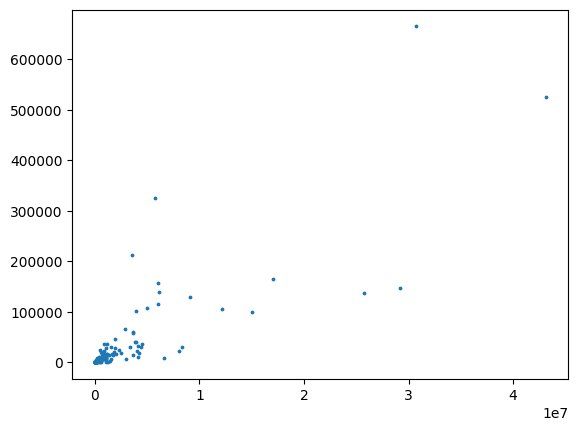

In [65]:
plt.scatter(merged_vacc_data['total_confirmed'], merged_vacc_data['total_deaths'], s=3)
plt.show()

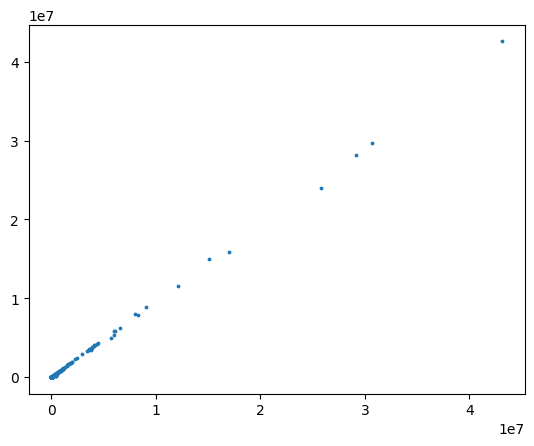

In [66]:
plt.scatter(merged_vacc_data['total_confirmed'], merged_vacc_data['total_recovered'], s=3)
plt.show()

<AxesSubplot: xlabel='total_confirmed', ylabel='total_deaths'>

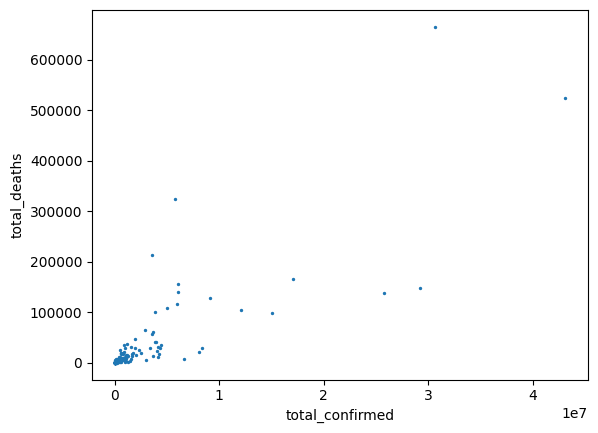

In [67]:
merged_vacc_data.plot.scatter('total_confirmed','total_deaths', s=2)

<AxesSubplot: xlabel='total_confirmed', ylabel='total_recovered'>

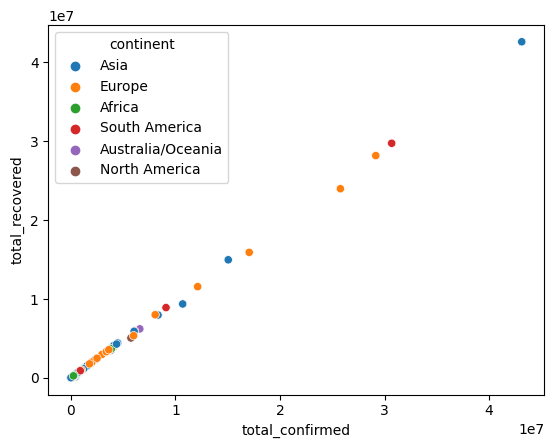

In [68]:
sns.scatterplot(x='total_confirmed',y='total_recovered', data=merged_data, hue='continent')

In [69]:
Covid_by_Country_top10 = merged_data.sort_values(by = "total_confirmed", ascending=False)

In [70]:
Covid_by_Country_top10.head(10)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
68,India,Asia,43121599,524214.0,42579693.0,17692.0,698.0,30686,373.0,843836914.0,600479.0,1405273033,0d74bd8a-84f7-4758-a220-043441f1568b,India,IN,india,440,44690738,3,530779,0,0,2023-04-12T06:09:06.257Z,{}
21,Brazil,South America,30682094,664920.0,29718402.0,298772.0,8318.0,142460,3087.0,63776166.0,296119.0,215373503,aea4fb6b-586d-499a-8103-063317b1517d,Brazil,BR,brazil,0,37076053,0,699276,0,0,2023-04-12T06:09:06.257Z,{}
53,France,Europe,29160802,147257.0,28156674.0,856871.0,1329.0,444914,2247.0,271490188.0,4142201.0,65542502,1eb11cbb-a861-4519-b098-731b0f6cea8b,France,FR,france,6308,39866718,11,166176,0,0,2023-04-12T06:09:06.257Z,{}
57,Germany,Europe,25780226,137919.0,23956700.0,1685607.0,1279.0,305877,1636.0,122332384.0,1451450.0,84282880,dccb8819-a679-4c58-94eb-67da0fb7ff40,Germany,DE,germany,7829,38249060,127,168935,0,0,2023-04-12T06:09:06.257Z,{}
73,Italy,Europe,17057873,165244.0,15894511.0,998118.0,347.0,282901,2741.0,217853667.0,3613054.0,60296265,bd36540e-ece5-4b07-b3d2-0968cf26982f,Italy,IT,italy,0,25603510,0,188322,0,0,2023-04-12T06:09:06.257Z,{}
156,Turkey,Asia,15053168,98890.0,14951238.0,3040.0,975.0,174977,1149.0,160622710.0,1867071.0,86029250,b28e2697-d65d-4993-90e2-5c26e9405e36,Turkey,TR,turkey,0,17042722,0,101492,0,0,2023-04-12T06:09:06.257Z,{}
144,Spain,Europe,12127122,105444.0,11548089.0,473589.0,339.0,259190,2254.0,471036328.0,10067352.0,46788503,b84a0e1b-6eb2-4d1e-9ad5-ebe9f377dee8,Spain,ES,spain,0,13770429,0,119479,0,0,2023-04-12T06:09:06.257Z,{}
163,Viet Nam,Asia,10696630,43065.0,9355040.0,1298525.0,340.0,108080,435.0,85811485.0,867048.0,98969721,c2f058f0-4f7c-4296-a453-2321205470e1,Viet Nam,VN,vietnam,0,11526994,0,43186,0,0,2023-04-12T06:09:06.257Z,{}
5,Argentina,South America,9101319,128729.0,8895999.0,76591.0,372.0,197992,2800.0,35716069.0,776974.0,45968174,5865744a-851c-406f-acbf-81144af1ad93,Argentina,AR,argentina,0,10044957,0,130472,0,0,2023-04-12T06:09:06.257Z,{}
75,Japan,Asia,8338211,30039.0,7951587.0,356585.0,139.0,66305,239.0,50444181.0,401129.0,125755488,192b4b5c-8cda-409a-b6ad-5395000cb6b5,Japan,JP,japan,9834,33320438,80,72997,0,0,2023-04-12T06:09:06.257Z,{}


<AxesSubplot: >

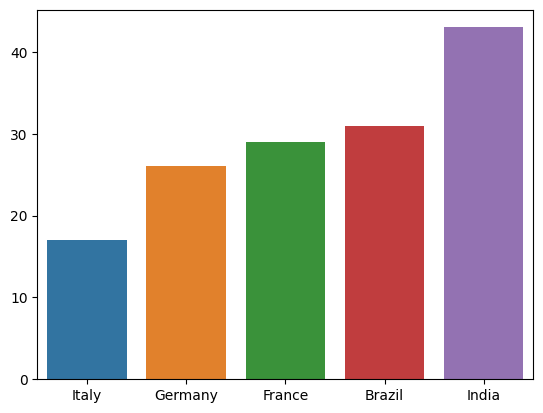

In [71]:
country = ['Italy', 'Germany', 'France', 'Brazil', 'India']
cases_million = [17, 26, 29, 31, 43]
sns.barplot(x= country, y= cases_million)

In [ ]:
sns.pairplot(Covid_by_Country_top10 , hue='country')